# Module 2 Final Project
- Student: Andrew Wester
- Date: December 2018
- Instructor: Rafael Carrasco

## Hypothesis 1 (Two Tail Test)

- H0 - There is no statistically significant difference in the quantity ordered of discounted vs. non-discounted products.
    - H0: $\mu_1$ = $\mu_2$
- H1 - There is a statistically significant difference in the quantity ordered of discounted vs. non-discounted products.
    - HA: $\mu_1$ $\neq$ $\mu_2$

## Hypothesis 2 (One Tail Test)

- H0 - The top employee does not have a higher average order price than the average employee.
    - H0: $\mu$ $\leq$ $\mu_0$
- H2 - The top employee does have a higher average order price than the average employee.
    - HA: $\mu$ > $\mu_0$

## Hypothesis 3 (One Tail Test)

- H0 - The top revenue producing region's average order price is not significantly different than the overall population.
    - H0: $\mu$ $\leq$ $\mu_0$
- H3 - The top revenue producing region has a higher average order price than the overall population.
    - HA: $\mu$ > $\mu_0$

## Hypothesis 4 (Two Tail Test)
- H0 - There is no significant difference in revenue from employees in Europe vs America.
    - $\mu_1$ = $\mu_2$
- H4 - There is a significant difference in revenue from employees in Europe vs America.
    - $\mu_1$ $\ne$ $\mu_2$

## Import Libraries

In [194]:
import numpy as np
import pandas as pd
import sqlite3
import statsmodels.api as sm

from scipy import stats
from statsmodels.formula.api import ols 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Create connection to Northwind Database

In [195]:
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

## Look at each table name from the Northwind Database

In [196]:
c.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

## From each table, create a new dataframe with information imported from table

In [197]:
employee_df = pd.read_sql_query('SELECT * FROM Employee;', conn)
print(employee_df.info())
employee_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
None


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [198]:
category_df = pd.read_sql_query('SELECT * FROM Category;', conn)
print(category_df.info())
category_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Id              8 non-null int64
CategoryName    8 non-null object
Description     8 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes
None


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [199]:
customer_df = pd.read_sql_query('SELECT * FROM Customer;', conn)
print(customer_df.info())
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
None


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [200]:
shipper_df = pd.read_sql_query('SELECT * FROM Shipper;', conn)
print(shipper_df.info())
shipper_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Id             3 non-null int64
CompanyName    3 non-null object
Phone          3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes
None


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [201]:
supplier_df = pd.read_sql_query('SELECT * FROM Supplier;', conn)
print(supplier_df.info())
supplier_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
Fax             13 non-null object
HomePage        5 non-null object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB
None


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [202]:
order_df = pd.read_sql_query('SELECT * FROM [Order];', conn)
print(order_df.info())
order_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [203]:
product_df = pd.read_sql_query('SELECT * FROM Product;', conn)
print(product_df.info())
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB
None


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


## Import OrderDetail Table and add columns for:
#### OrderPrice = (Quantity x UnitPrice)     &     DiscountPrice = (OrderPrice x (1-Discount))

In [204]:
orderdetail_df = pd.read_sql_query('SELECT * FROM OrderDetail;', conn)
orderdetail_df['OrderPrice'] = orderdetail_df.UnitPrice * orderdetail_df.Quantity
orderdetail_df['DiscountPrice'] = orderdetail_df.OrderPrice * (1-orderdetail_df.Discount)
print(orderdetail_df.info())
orderdetail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
Id               2155 non-null object
OrderId          2155 non-null int64
ProductId        2155 non-null int64
UnitPrice        2155 non-null float64
Quantity         2155 non-null int64
Discount         2155 non-null float64
OrderPrice       2155 non-null float64
DiscountPrice    2155 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 134.8+ KB
None


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248/11,10248,11,14.0,12,0.0,168.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0,1696.0


In [205]:
customerdemo_df = pd.read_sql_query('SELECT * FROM CustomerCustomerDemo;', conn)
print(customerdemo_df.info())
customerdemo_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id                0 non-null object
CustomerTypeId    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


,Id,CustomerTypeId


In [206]:
customerdemographic_df = pd.read_sql_query('SELECT * FROM CustomerDemographic;', conn)
print(customerdemographic_df.info())
customerdemographic_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id              0 non-null object
CustomerDesc    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


,Id,CustomerDesc


In [207]:
region_df = pd.read_sql_query('SELECT * FROM Region;', conn)
print(region_df.info())
region_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Id                   4 non-null int64
RegionDescription    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes
None


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [208]:
territory_df = pd.read_sql_query('SELECT * FROM Territory;', conn)
print(territory_df.info())
territory_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Id                      53 non-null object
TerritoryDescription    53 non-null object
RegionId                53 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [209]:
employeeterritory_df = pd.read_sql_query('SELECT * FROM EmployeeTerritory;', conn)
print(employeeterritory_df.info())
employeeterritory_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Id             49 non-null object
EmployeeId     49 non-null int64
TerritoryId    49 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
None


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


# Now that Tables are Imported...

## Hypothesis 1:
#### H0: No statistically significant difference in quantity ordered for discounted vs non-discounted products
#### H0: $\mu_1$ = $\mu_2$
#### H1: There is a statistically significant difference in quantity ordered of discounted vs. non-discounted products.
#### HA: $\mu_1$ $\neq$ $\mu_2$

## Graph the dispersion of Discounts in all the Orders

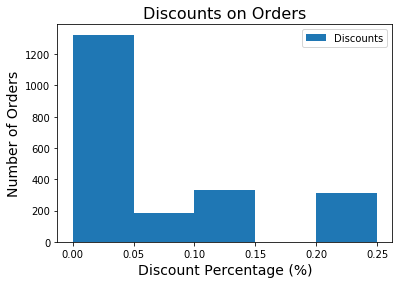

In [210]:
x = orderdetail_df['Discount']
plt.hist(x, label="Discounts", bins=5, align='mid')
plt.title("Discounts on Orders", fontsize = 16)
plt.xlabel("Discount Percentage (%)", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.legend();

## Split the data by orders that had a discount applied and those without a discount

## Display information for both tables in order to examine number of orders, etc...

In [211]:
discount = orderdetail_df.loc[orderdetail_df['Discount'] > 0]
full = orderdetail_df.loc[orderdetail_df['Discount'] == 0]
print("Discounted Table")
print(discount.info())
print()
print('-'*50)
print()
print("Full Price Table")
print(full.info())

Discounted Table
<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 6 to 2152
Data columns (total 8 columns):
Id               838 non-null object
OrderId          838 non-null int64
ProductId        838 non-null int64
UnitPrice        838 non-null float64
Quantity         838 non-null int64
Discount         838 non-null float64
OrderPrice       838 non-null float64
DiscountPrice    838 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 58.9+ KB
None

--------------------------------------------------

Full Price Table
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 2154
Data columns (total 8 columns):
Id               1317 non-null object
OrderId          1317 non-null int64
ProductId        1317 non-null int64
UnitPrice        1317 non-null float64
Quantity         1317 non-null int64
Discount         1317 non-null float64
OrderPrice       1317 non-null float64
DiscountPrice    1317 non-null float64
dtypes: float64(4), int64(3), ob

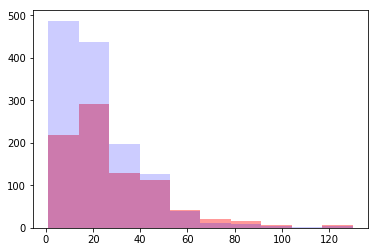

In [212]:
plt.hist(discount.Quantity, alpha = 0.4, color='red')
plt.hist(full.Quantity, alpha = 0.2, color='blue');

## Look at differences in Variance, Mean, and Standard Deviation between the two groups

In [213]:
discount.Quantity.var(), full.Quantity.var()

(431.45268788690146, 306.51232768588454)

In [214]:
discount.Quantity.mean(), full.Quantity.mean()

(27.10978520286396, 21.715261958997722)

In [215]:
discount.Quantity.std(), full.Quantity.std()

(20.77143923484604, 17.50749347239303)

## WHY: Independent T-Test
- We run the Independent t Test to compare the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

In [216]:
stats.ttest_ind(discount.Quantity.values, full.Quantity.values)

Ttest_indResult(statistic=6.4785631962949015, pvalue=1.1440924523215966e-10)

## WHY: Welch's T-Test
- We run a Welch's T-Test when we can't assume that we have equal variance and sample size between our two samples

In [217]:
stats.ttest_ind(discount.Quantity.values, full.Quantity.values, equal_var=False)

Ttest_indResult(statistic=6.239069142123973, pvalue=5.65641429030433e-10)

## Low P-Value!

#### T-Test Tells us: There is a Statistically Significant Difference in Quantity of items ordered with a discount vs. non-discount

In [218]:
def cohens_d(group1, group2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [219]:
cohens_d(discount.Quantity, full.Quantity)

0.2862724481729282

## A Cohen's d value of about 0.3 indicates a small to medium effect size, which is the practical size of the difference between the two groups.

# Hypothesis 2 

- H0 - The top employee does not sell more in dollars than the average employee.
    - H0: $\mu$ $\leq$ $\mu_0$
- H2 - The top employee sells more in dollars than the average employee.
    - HA: $\mu$ > $\mu_0$


### Start by looking at the table of employees and their territories to examine differences and points of interest

In [220]:
employee_df

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [221]:
employeeterritory_df.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [222]:
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [223]:
order_df = order_df.drop(columns=['CustomerId', 'RequiredDate', 'ShippedDate', 'ShipName', 'ShipAddress', 
                       'ShipCity', 'ShipPostalCode'])

In [224]:
order_df.head()

,Id,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
0,10248,5,2012-07-04,3,32.38,Western Europe,France
1,10249,6,2012-07-05,1,11.61,Western Europe,Germany
2,10250,4,2012-07-08,2,65.83,South America,Brazil
3,10251,3,2012-07-08,1,41.34,Western Europe,France
4,10252,4,2012-07-09,2,51.30,Western Europe,Belgium


In [225]:
orderdetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248/11,10248,11,14.0,12,0.0,168.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0,1696.0


In [226]:
orderdetail_df = orderdetail_df.drop(columns='Id')
orderdetail_df.sort_values(by='OrderId', inplace=True)
print(orderdetail_df.info())
orderdetail_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 7 columns):
OrderId          2155 non-null int64
ProductId        2155 non-null int64
UnitPrice        2155 non-null float64
Quantity         2155 non-null int64
Discount         2155 non-null float64
OrderPrice       2155 non-null float64
DiscountPrice    2155 non-null float64
dtypes: float64(4), int64(3)
memory usage: 134.7 KB
None


,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248,11,14.0,12,0.0,168.0,168.0
1,10248,42,9.8,10,0.0,98.0,98.0
2,10248,72,34.8,5,0.0,174.0,174.0
3,10249,14,18.6,9,0.0,167.4,167.4
4,10249,51,42.4,40,0.0,1696.0,1696.0


In [227]:
print(orderdetail_df.shape)
orderdetail_df.head()

(2155, 7)


,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248,11,14.0,12,0.0,168.0,168.0
1,10248,42,9.8,10,0.0,98.0,98.0
2,10248,72,34.8,5,0.0,174.0,174.0
3,10249,14,18.6,9,0.0,167.4,167.4
4,10249,51,42.4,40,0.0,1696.0,1696.0


In [228]:
orderdetail_agg_df = orderdetail_df.groupby(by='OrderId')["OrderPrice", "DiscountPrice"].sum()
orderdetail_agg_df.head()

,OrderPrice,DiscountPrice
OrderId,,
10248,440.0,440.00
10249,1863.4,1863.40
10250,1813.0,1552.60
10251,670.8,654.06
10252,3730.0,3597.90


In [229]:
orderdetail_agg_df.shape

(830, 2)

In [230]:
order_df = pd.read_sql_query("SELECT * FROM [Order];", conn)
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [231]:
order_df = order_df.drop(columns=['CustomerId', 'RequiredDate', 'ShippedDate', 'ShipName', 'ShipAddress', 
                       'ShipCity', 'ShipPostalCode'])
order_df.head()

,Id,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
0,10248,5,2012-07-04,3,32.38,Western Europe,France
1,10249,6,2012-07-05,1,11.61,Western Europe,Germany
2,10250,4,2012-07-08,2,65.83,South America,Brazil
3,10251,3,2012-07-08,1,41.34,Western Europe,France
4,10252,4,2012-07-09,2,51.30,Western Europe,Belgium


In [232]:
order_df.rename(columns={"Id":"OrderId"}, inplace=True)
order_df.head()

,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry
0,10248,5,2012-07-04,3,32.38,Western Europe,France
1,10249,6,2012-07-05,1,11.61,Western Europe,Germany
2,10250,4,2012-07-08,2,65.83,South America,Brazil
3,10251,3,2012-07-08,1,41.34,Western Europe,France
4,10252,4,2012-07-09,2,51.30,Western Europe,Belgium


In [233]:
orderdetail_agg_df.head()

,OrderPrice,DiscountPrice
OrderId,,
10248,440.0,440.00
10249,1863.4,1863.40
10250,1813.0,1552.60
10251,670.8,654.06
10252,3730.0,3597.90


In [234]:
all_orders = order_df.join(orderdetail_agg_df, on="OrderId")
all_orders.head()

,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderPrice,DiscountPrice
0,10248,5,2012-07-04,3,32.38,Western Europe,France,440.0,440.00
1,10249,6,2012-07-05,1,11.61,Western Europe,Germany,1863.4,1863.40
2,10250,4,2012-07-08,2,65.83,South America,Brazil,1813.0,1552.60
3,10251,3,2012-07-08,1,41.34,Western Europe,France,670.8,654.06
4,10252,4,2012-07-09,2,51.30,Western Europe,Belgium,3730.0,3597.90


In [235]:
print(all_orders.info())
all_orders.sort_values(by='EmployeeId', inplace=True)
all_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 9 columns):
OrderId          830 non-null int64
EmployeeId       830 non-null int64
OrderDate        830 non-null object
ShipVia          830 non-null int64
Freight          830 non-null float64
ShipRegion       830 non-null object
ShipCountry      830 non-null object
OrderPrice       830 non-null float64
DiscountPrice    830 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 58.4+ KB
None


,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderPrice,DiscountPrice
829,11077,1,2014-05-06,2,8.53,North America,USA,1374.60,1255.7205
139,10387,1,2012-12-18,2,93.63,Scandinavia,Norway,1058.40,1058.4000
587,10835,1,2014-01-15,3,69.53,Western Europe,Germany,851.00,845.8000
586,10834,1,2014-01-15,3,29.78,South America,Brazil,1508.12,1432.7140
145,10393,1,2012-12-25,3,126.56,North America,USA,3302.60,2556.9500


In [236]:
keys = ["employee{}_orders".format(id) for id in all_orders.EmployeeId.unique()]
keys

['employee1_orders',
 'employee2_orders',
 'employee3_orders',
 'employee4_orders',
 'employee5_orders',
 'employee6_orders',
 'employee7_orders',
 'employee8_orders',
 'employee9_orders']

In [237]:
employee_orders_dict = {}
for index, key in enumerate(keys):
    employee_orders_dict[key] = all_orders[all_orders.EmployeeId==index+1]

In [238]:
employee_orders_dict

{'employee1_orders':      OrderId  EmployeeId   OrderDate  ShipVia  Freight       ShipRegion  \
 829    11077           1  2014-05-06        2     8.53    North America   
 139    10387           1  2012-12-18        2    93.63      Scandinavia   
 587    10835           1  2014-01-15        3    69.53   Western Europe   
 586    10834           1  2014-01-15        3    29.78    South America   
 145    10393           1  2012-12-25        3   126.56    North America   
 146    10394           1  2012-12-25        3    30.34    North America   
 148    10396           1  2012-12-27        3   135.35   Western Europe   
 577    10825           1  2014-01-09        1    79.25   Western Europe   
 152    10400           1  2013-01-01        3    83.93    British Isles   
 137    10385           1  2012-12-17        2    30.96    North America   
 153    10401           1  2013-01-01        1    12.51    North America   
 157    10405           1  2013-01-06        1    34.82    South Ame

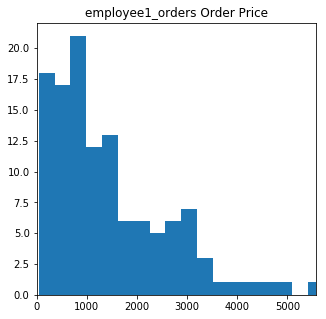

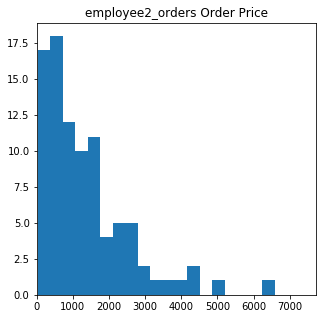

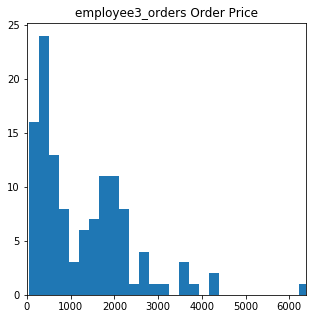

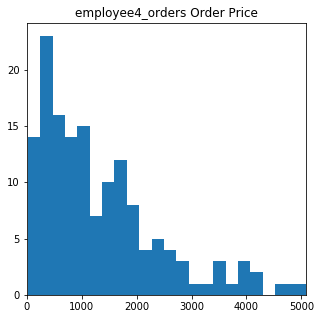

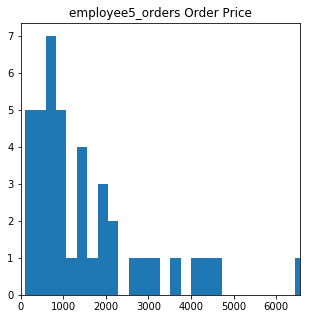

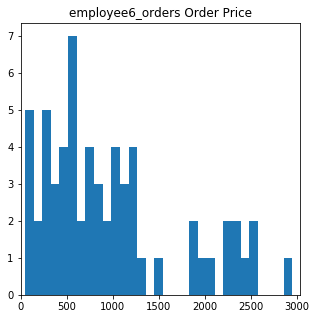

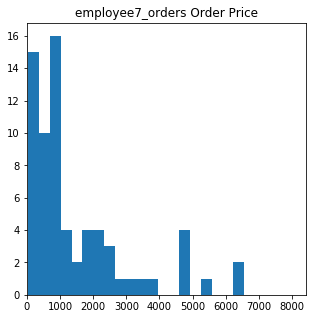

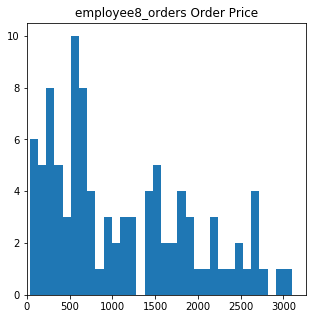

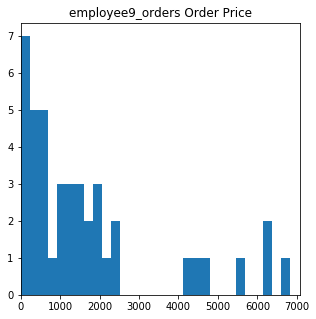

In [239]:
for employee_id, table in employee_orders_dict.items():
    plt.figure(figsize=(5, 5))
    plt.hist(table.OrderPrice, bins=50)
    plt.xlim(0, 3*table.OrderPrice.std())
    plt.title(employee_id + " Order Price")
    plt.show()

In [240]:
a = all_orders[all_orders.EmployeeId == 1]['OrderPrice'].sum()
b = all_orders[all_orders.EmployeeId == 1]['DiscountPrice'].sum()
c = all_orders[all_orders.EmployeeId == 1]["OrderId"].nunique()
print("Employee 1 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 1 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 1 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 1 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 1 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 1 - Total Sales: $202143.71
--------------------------------------------------
Employee 1 - Total Discounted Sales: $192107.60
--------------------------------------------------
Employee 1 - Total Number of Orders: 123
--------------------------------------------------
Employee 1 - Average Sale Price: $1643.44
--------------------------------------------------
Employee 1 - Average Discount Sale Price: $1561.85


In [241]:
a = employee_orders_dict["employee2_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee2_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 2]["OrderId"].nunique()
print("Employee 2 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 2 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 2 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 2 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 2 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 2 - Total Sales: $177749.26
--------------------------------------------------
Employee 2 - Total Discounted Sales: $166537.76
--------------------------------------------------
Employee 2 - Total Number of Orders: 96
--------------------------------------------------
Employee 2 - Average Sale Price: $1851.55
--------------------------------------------------
Employee 2 - Average Discount Sale Price: $1734.77


In [242]:
a = employee_orders_dict["employee3_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee3_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 3]["OrderId"].nunique()
print("Employee 3 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 3 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 3 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 3 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 3 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 3 - Total Sales: $213051.30
--------------------------------------------------
Employee 3 - Total Discounted Sales: $202812.84
--------------------------------------------------
Employee 3 - Total Number of Orders: 127
--------------------------------------------------
Employee 3 - Average Sale Price: $1677.57
--------------------------------------------------
Employee 3 - Average Discount Sale Price: $1596.95


In [243]:
a = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee4_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()
print("Employee 4 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 4 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 4 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 4 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 4 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 4 - Total Sales: $250187.45
--------------------------------------------------
Employee 4 - Total Discounted Sales: $232890.85
--------------------------------------------------
Employee 4 - Total Number of Orders: 156
--------------------------------------------------
Employee 4 - Average Sale Price: $1603.77
--------------------------------------------------
Employee 4 - Average Discount Sale Price: $1492.89


In [244]:
a = employee_orders_dict["employee5_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee5_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 5]["OrderId"].nunique()
print("Employee 5 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 5 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 5 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 5 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 5 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 5 - Total Sales: $75567.75
--------------------------------------------------
Employee 5 - Total Discounted Sales: $68792.28
--------------------------------------------------
Employee 5 - Total Number of Orders: 42
--------------------------------------------------
Employee 5 - Average Sale Price: $1799.23
--------------------------------------------------
Employee 5 - Average Discount Sale Price: $1637.91


In [245]:
a = employee_orders_dict["employee6_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee6_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 6]["OrderId"].nunique()
print("Employee 6 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 6 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 6 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 6 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 6 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 6 - Total Sales: $78198.10
--------------------------------------------------
Employee 6 - Total Discounted Sales: $73913.13
--------------------------------------------------
Employee 6 - Total Number of Orders: 67
--------------------------------------------------
Employee 6 - Average Sale Price: $1167.14
--------------------------------------------------
Employee 6 - Average Discount Sale Price: $1103.18


In [246]:
a = employee_orders_dict["employee7_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee7_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 7]["OrderId"].nunique()
print("Employee 7 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 7 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 7 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 7 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 7 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 7 - Total Sales: $141295.99
--------------------------------------------------
Employee 7 - Total Discounted Sales: $124568.24
--------------------------------------------------
Employee 7 - Total Number of Orders: 72
--------------------------------------------------
Employee 7 - Average Sale Price: $1962.44
--------------------------------------------------
Employee 7 - Average Discount Sale Price: $1730.11


In [247]:
a = employee_orders_dict["employee8_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee8_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 8]["OrderId"].nunique()
print("Employee 8 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 8 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 8 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 8 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 8 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 8 - Total Sales: $133301.03
--------------------------------------------------
Employee 8 - Total Discounted Sales: $126862.28
--------------------------------------------------
Employee 8 - Total Number of Orders: 104
--------------------------------------------------
Employee 8 - Average Sale Price: $1281.74
--------------------------------------------------
Employee 8 - Average Discount Sale Price: $1219.83


In [248]:
a = employee_orders_dict["employee9_orders"]["OrderPrice"].sum()
b = employee_orders_dict["employee9_orders"]["DiscountPrice"].sum()
c = all_orders.loc[all_orders.EmployeeId == 9]["OrderId"].nunique()
print("Employee 9 - Total Sales: ${:.2f}".format(a))
print('-'*50)
print("Employee 9 - Total Discounted Sales: ${:.2f}".format(b))
print('-'*50)
print("Employee 9 - Total Number of Orders: {}".format(c))
print('-'*50)
print("Employee 9 - Average Sale Price: ${:.2f}".format(a / c))
print('-'*50)
print("Employee 9 - Average Discount Sale Price: ${:.2f}".format(b / c))

Employee 9 - Total Sales: $82964.00
--------------------------------------------------
Employee 9 - Total Discounted Sales: $77308.07
--------------------------------------------------
Employee 9 - Total Number of Orders: 43
--------------------------------------------------
Employee 9 - Average Sale Price: $1929.40
--------------------------------------------------
Employee 9 - Average Discount Sale Price: $1797.86


In [249]:
all_orders.sort_values(by='EmployeeId').head()

,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderPrice,DiscountPrice
829,11077,1,2014-05-06,2,8.53,North America,USA,1374.6,1255.7205
720,10968,1,2014-03-23,3,74.60,Western Europe,Austria,1408.0,1408.0000
37,10285,1,2012-08-20,2,76.83,Western Europe,Germany,2179.2,1743.3600
298,10546,1,2013-05-23,3,194.72,Western Europe,France,2812.0,2812.0000
579,10827,1,2014-01-12,2,63.54,Western Europe,France,843.0,843.0000


In [250]:
all_orders.head()

,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderPrice,DiscountPrice
829,11077,1,2014-05-06,2,8.53,North America,USA,1374.60,1255.7205
139,10387,1,2012-12-18,2,93.63,Scandinavia,Norway,1058.40,1058.4000
587,10835,1,2014-01-15,3,69.53,Western Europe,Germany,851.00,845.8000
586,10834,1,2014-01-15,3,29.78,South America,Brazil,1508.12,1432.7140
145,10393,1,2012-12-25,3,126.56,North America,USA,3302.60,2556.9500


In [251]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice"].sum()

,OrderPrice,DiscountPrice
EmployeeId,,
1,202143.71,192107.6045
2,177749.26,166537.7550
3,213051.30,202812.8430
4,250187.45,232890.8460
5,75567.75,68792.2825
6,78198.10,73913.1295
7,141295.99,124568.2350
8,133301.03,126862.2775
9,82964.00,77308.0665


In [252]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice"].mean()

,OrderPrice,DiscountPrice
EmployeeId,,
1,1643.444797,1561.850443
2,1851.554792,1734.768281
3,1677.569291,1596.951520
4,1603.765705,1492.890038
5,1799.232143,1637.911488
6,1167.135821,1103.181037
7,1962.444306,1730.114375
8,1281.740673,1219.829591
9,1929.395349,1797.862012


In [253]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice"].var()

,OrderPrice,DiscountPrice
EmployeeId,,
1,3.434955e+06,3.321205e+06
2,6.607649e+06,5.774262e+06
3,4.524529e+06,4.340879e+06
4,2.873401e+06,2.536098e+06
5,4.762375e+06,3.319694e+06
6,1.021370e+06,8.987321e+05
7,7.889411e+06,5.196075e+06
8,1.181769e+06,1.119141e+06
9,5.548636e+06,5.130859e+06


In [254]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice"].std()

,OrderPrice,DiscountPrice
EmployeeId,,
1,1853.363293,1822.417469
2,2570.534843,2402.969402
3,2127.093920,2083.477699
4,1695.110923,1592.512978
5,2182.286722,1822.002722
6,1010.628657,948.014839
7,2808.809619,2279.490011
8,1087.092217,1057.894400
9,2355.554258,2265.140009


In [255]:
all_orders.OrderPrice.sum()

1354458.59

In [256]:
all_orders.OrderId.nunique()

830

In [257]:
# Average between total order revenue and number of orders
all_orders.OrderPrice.sum() / all_orders.OrderId.nunique()

1631.8778192771085

# SO....
#### We can find out total amount of sales for all orders (sum of all order prices): $1,354,458.59$
#### We can find the total number of orders (total number of orders placed): 830
#### Therefore, we can calculated the average price of each order placed (total sales / total orders): $1,631.88$

In [258]:
print("Total Sales: ${:.2f}".format(all_orders.OrderPrice.sum()))
print("Total Orders: {}".format(all_orders.OrderId.nunique()))
print("Average Order Price: ${:.2f}".format((all_orders.OrderPrice.sum() / all_orders.OrderId.nunique())))

Total Sales: $1354458.59
Total Orders: 830
Average Order Price: $1631.88


### So, our hypotheses are:

# RE-SPECIFY HYPOTHESIS

## Ho: $\mu$ $\leq$ $1631.88, The mean of our top selling employee's sales will not be greater than our population mean

## Ha: **\(x̄)** > $1631.88, The mean of our top selling employee's sales will be greater than our population mean

In [259]:
all_orders.sort_values(by='EmployeeId', inplace=True)

In [260]:
# Population mean for order price (μ)
mu = 1631.88

# Mean (x̄) order price for top sales person
orders = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()
sample = pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice'])
total = all_orders[all_orders['EmployeeId'] == 4]['OrderPrice'].sum()
x_bar = total / orders

# Top Sales Person Standard Deviation (sigma)
sigma = sample.std()

# Sample size (n)
n = orders

# Degrees of Freedom
df = n-1

# Difference in sample mean
diff = x_bar - mu


# Print the findings
print('The sample contains {} observations, '.format(n))
print('Having a mean of {:.2f}, and a standard deviation (sigma) = {:.3f}'.format(x_bar, sigma))
print('With {} degrees of freedom. The difference between sample and population means is: {:.2f}'.format(df, diff))
print('-'*50)
print("x̄ = {:.2f}".format(x_bar))
print("μ = {:.2f}".format(mu))

The sample contains 156 observations, 
Having a mean of 1603.77, and a standard deviation (sigma) = 1695.111
With 155 degrees of freedom. The difference between sample and population means is: -28.11
--------------------------------------------------
x̄ = 1603.77
μ = 1631.88


In [261]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=155),3)
t_crit

1.655

In [262]:
sample = pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice'])
results = stats.ttest_1samp(a= sample, popmean= mu)
results

Ttest_1sampResult(statistic=-0.2071530692419274, pvalue=0.836162215030763)

In [263]:
def cohens_d(group1, group2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [264]:
cohens_d(pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice']), all_orders.OrderPrice)

-0.014439794098318366

### SO, we can see that our average price of order for the top employee (Employee Id 4) was $1,603.77$ while the average for all orders over the entirety of the population was $1,631.88$.  These values are NOT statistically significantly different (p-value NOT close to zero, 0.836), and the Effect Size that we find from Cohen's d shows that it is an extremely small effect size of -0.0145

### Follow Up: LOOK AT THE SAME EXPERIMENT BUT FOR EMPLOYEE WITH HIGHEST AVERAGE ORDER PRICE
- Since we saw that the AVERAGE Order Price of the top employee (employee 4) was actually LESS than our population average, and we cannot prove our Null Hypothesis wrong, and we cannot prove our Alternative Hypothesis as correct since we were trying to show that the top selling employee would have a higher price per order than the average.

- However, perhaps our considering the Average Order Price is the wrong tactic, and we need to instead examine total revenue generated from the top employee compared with the average...

In [265]:
all_orders.groupby(by=all_orders.EmployeeId)["OrderPrice", "DiscountPrice"].sum()

,OrderPrice,DiscountPrice
EmployeeId,,
1,202143.71,192107.6045
2,177749.26,166537.7550
3,213051.30,202812.8430
4,250187.45,232890.8460
5,75567.75,68792.2825
6,78198.10,73913.1295
7,141295.99,124568.2350
8,133301.03,126862.2775
9,82964.00,77308.0665


In [266]:
total = all_orders.OrderPrice.sum()
employees = 9
average = total / employees
emp4 = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()
print("Average Sales per Employee: ${:.2f}".format(average))
print('-'*40)
print("Sales for Employee 4: ${}".format(emp4))
print('-'*40)

Average Sales per Employee: $150495.40
----------------------------------------
Sales for Employee 4: $250187.44999999995
----------------------------------------


In [267]:
# Population mean for total sales per employee (μ)
mu = 150495.40

# Mean (x̄) total sales for top sales person
x_bar = employee_orders_dict["employee4_orders"]["OrderPrice"].sum()

# Top Sales Person Standard Deviation (sigma)
sigma = employee_orders_dict['employee4_orders']["OrderPrice"].std()

# Sample size (n)
n = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()

# Degrees of Freedom
df = n-1

# Difference in sample mean
diff = x_bar - mu


# Print the findings
print('The sample contains {} observations, '.format(n))
print('Having a mean of {:.2f}, and a standard deviation (sigma) = {:.3f}'.format(x_bar, sigma))
print('With {} degrees of freedom. The difference between sample and population means is: {:.2f}'.format(df, diff))
print('-'*50)
print("x̄ = {:.2f}".format(x_bar))
print("μ = {:.2f}".format(mu))

The sample contains 156 observations, 
Having a mean of 250187.45, and a standard deviation (sigma) = 1695.111
With 155 degrees of freedom. The difference between sample and population means is: 99692.05
--------------------------------------------------
x̄ = 250187.45
μ = 150495.40


In [268]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=155),3)
t_crit

1.655

In [269]:
results = stats.ttest_1samp(a= pd.Series(all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice']), popmean= mu)
results

Ttest_1sampResult(statistic=-1097.0703398139356, pvalue=2.0707621288088947e-303)

In [270]:
def cohens_d_alt(group1, group2, n1, n2, var1, var2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1 - group2
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [271]:
group1 = all_orders.loc[all_orders.EmployeeId == 4]['OrderPrice'].sum()
group2 = (all_orders.OrderPrice.sum() / 9)
n1 = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].nunique()
n2 = all_orders.OrderId.nunique()
var1 = all_orders.loc[all_orders.EmployeeId == 4]["OrderId"].var()
var2 = all_orders.OrderId.var()
print("Group 1 {}".format(group1))
print("Group 2 {}".format(group2))
print("n1 {}".format(n1))
print("n2 {}".format(n2))
print("var1 {}".format(var1))
print("var2 {}".format(var2))
cohens_d_alt(group1, group2, n1, n2, var1, var2)

Group 1 250187.45
Group 2 150495.39888888889
n1 156
n2 830
var1 56060.78424317618
var2 57477.5


416.63913757806256

# SO:
- Now our Cohen's d value is over 400 meaning an extremely large effect size.

In [272]:
order_df = pd.read_sql_query('SELECT * FROM [Order];', conn)
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [273]:
employee_df

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [274]:
e4 = order_df[order_df['EmployeeId'] == 4]['CustomerId'].nunique()
first, last, title = employee_df.iloc[3]['FirstName'], employee_df.iloc[3]['LastName'], employee_df.iloc[3]['Title']
print("Employee {} {}, {}, was the top selling employee to a total of {} customers sold to".format(first, last, title, e4))

Employee Margaret Peacock, Sales Representative, was the top selling employee to a total of 75 customers sold to


In [275]:
e1 = order_df[order_df['EmployeeId'] == 1]['CustomerId'].nunique()
first, last, title = employee_df.iloc[0]['FirstName'], employee_df.iloc[0]['LastName'], employee_df.iloc[0]['Title']
print("Employee {} {}, {}, sold orders to a total of {} customers".format(first, last, title, e1))

Employee Nancy Davolio, Sales Representative, sold orders to a total of 65 customers


In [276]:
e2 = order_df[order_df['EmployeeId'] == 2]['CustomerId'].nunique()
first, last, title = employee_df.iloc[1]['FirstName'], employee_df.iloc[1]['LastName'], employee_df.iloc[1]['Title']
print("{}, {} {}, sold orders to a total of {} customers".format(title, first, last, e2))

Vice President, Sales, Andrew Fuller, sold orders to a total of 59 customers


In [277]:
e3 = order_df[order_df['EmployeeId'] == 3]['CustomerId'].nunique()
first, last, title = employee_df.iloc[2]['FirstName'], employee_df.iloc[2]['LastName'], employee_df.iloc[2]['Title']
print("Employee {} {}, {}, sold orders to a total of {} customers".format(first, last, title, e3))

Employee Janet Leverling, Sales Representative, sold orders to a total of 63 customers


In [278]:
e5 = order_df[order_df['EmployeeId'] == 5]['CustomerId'].nunique()
first, last, title = employee_df.iloc[4]['FirstName'], employee_df.iloc[4]['LastName'], employee_df.iloc[4]['Title']
print("Employee {} {}, {}, sold orders to a total of {} customers".format(first, last, title, e5))

Employee Steven Buchanan, Sales Manager, sold orders to a total of 29 customers


In [279]:
e6 = order_df[order_df['EmployeeId'] == 6]['CustomerId'].nunique()
first, last, title = employee_df.iloc[6]['FirstName'], employee_df.iloc[6]['LastName'], employee_df.iloc[6]['Title']
print("Employee {} {}, {}, sold orders to a total of {} customers".format(first, last, title, e6))

Employee Robert King, Sales Representative, sold orders to a total of 43 customers


In [280]:
e7 = order_df[order_df['EmployeeId'] == 7]['CustomerId'].nunique()
first, last, title = employee_df.iloc[7]['FirstName'], employee_df.iloc[7]['LastName'], employee_df.iloc[7]['Title']
print("{} {} {}, sold orders to a total of {} customers".format(title, first, last, e7))

Inside Sales Coordinator Laura Callahan, sold orders to a total of 45 customers


In [281]:
e8 = order_df[order_df['EmployeeId'] == 8]['CustomerId'].nunique()
first, last, title = employee_df.iloc[8]['FirstName'], employee_df.iloc[8]['LastName'], employee_df.iloc[8]['Title']
print("Employee {} {}, {}, sold orders to a total of {} customers".format(first, last, title, e8))

Employee Anne Dodsworth, Sales Representative, sold orders to a total of 56 customers


In [282]:
totalcustomers = e1 + e2 + e3 + e4 + e5 + e6 + e7 + e8
totalcustomers

435

In [283]:
round((totalcustomers / 9), 3)

48.333

# Conclusion from Hypothesis 2:

- While we were originally unable to prove our null hypothesis (that top employee's average sales would be higher than overall average sales) false, we were able to take another look at the data, and see that while the average order price may not have been any higher, the total sales of that top employee was statistically significantly higher than the average total sales.
- This indicates to us that the top employee was able to place a greater quantity of orders, while the average price of the orders placed was not necessarily any different than the average. 
- We followed this up once again to confirm that the top employee did not have an excessive number of clients relative to the other sales representatives.  We found that the top employee placed orders for 75 customers , while every other employee placed orders for customers ranging from 29 to 65 (with an average of 48.333 customers per sales rep).  Although this top employee DID have more customers to sell to, which should increase his likelihood of higher sales, it did not seem as if he would be likely enough to place over 60 more orders than the total average, and over 70 more orders than everyone else's average orders. **(See next 3 lines of code for totals)**

In [284]:
employee4_orders = all_orders[all_orders.EmployeeId == 4]['OrderId'].nunique()
employee4_orders

156

In [285]:
AverageOrderQty = all_orders.OrderId.nunique() / 9
AverageOrderQty

92.22222222222223

In [286]:
AverageQtyOthers = (all_orders.OrderId.nunique() - employee4_orders) / 8
AverageQtyOthers

84.25

# Hypothesis 3:
#### Ho: There is no significant difference between the top regions' average order price and the overall average order price

   - H0: $\mu_1$ = $\mu_2$

#### H3: There is a significant difference between the top regions' average order price and the overall average order price
   - HA: $\mu_1$ $\neq$ $\mu_2$


In [287]:
order_df = pd.read_sql_query('SELECT * FROM [Order];', conn)
print(order_df.info())
order_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [288]:
territory_df.head(10)

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1
5,02184,Braintree,1
6,02903,Providence,1
7,03049,Hollis,3
8,03801,Portsmouth,3
9,06897,Wilton,1


In [289]:
align_territory_df = territory_df.sort_values(by='Id')
align_territory_df = align_territory_df.set_index(align_territory_df.Id)
align_territory_df = align_territory_df.drop(columns='Id')
align_territory_df = align_territory_df.rename_axis("TerritoryId")
align_territory_df.head()

,TerritoryDescription,RegionId
TerritoryId,,
01581,Westboro,1
01730,Bedford,1
01833,Georgetow,1
02116,Boston,1
02139,Cambridge,1


In [290]:
employeeterritory_df.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [291]:
align_employeeterritory_df = employeeterritory_df.sort_values(by='TerritoryId')
align_employeeterritory_df = align_employeeterritory_df.set_index(align_employeeterritory_df.TerritoryId)
align_employeeterritory_df = align_employeeterritory_df.drop(columns=['Id', 'TerritoryId'])
align_employeeterritory_df.head()

,EmployeeId
TerritoryId,
01581,2
01730,2
01833,2
02116,2
02139,2


In [292]:
territory_info = pd.concat([align_employeeterritory_df, align_territory_df], axis=1, sort=True)
territory_info = territory_info.rename_axis("TerritoryId")
territory_info.head()

,EmployeeId,TerritoryDescription,RegionId
TerritoryId,,,
01581,2.0,Westboro,1
01730,2.0,Bedford,1
01833,2.0,Georgetow,1
02116,2.0,Boston,1
02139,2.0,Cambridge,1


In [293]:
territory_info.head()

,EmployeeId,TerritoryDescription,RegionId
TerritoryId,,,
01581,2.0,Westboro,1
01730,2.0,Bedford,1
01833,2.0,Georgetow,1
02116,2.0,Boston,1
02139,2.0,Cambridge,1


In [294]:
all_orders.head()

,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderPrice,DiscountPrice
829,11077,1,2014-05-06,2,8.53,North America,USA,1374.6,1255.7205
720,10968,1,2014-03-23,3,74.60,Western Europe,Austria,1408.0,1408.0000
37,10285,1,2012-08-20,2,76.83,Western Europe,Germany,2179.2,1743.3600
298,10546,1,2013-05-23,3,194.72,Western Europe,France,2812.0,2812.0000
579,10827,1,2014-01-12,2,63.54,Western Europe,France,843.0,843.0000


In [295]:
print(all_orders.ShipRegion.unique())

['North America' 'Western Europe' 'Southern Europe' 'Central America'
 'South America' 'Northern Europe' 'British Isles' 'Scandinavia'
 'Eastern Europe']


In [296]:
n_america = all_orders.loc[all_orders.ShipRegion == 'North America']
print("North America Sales: ${:.2f}".format(n_america.OrderPrice.sum()))

North America Sales: $318901.08


In [297]:
w_europe = all_orders.loc[all_orders.ShipRegion == 'Western Europe']
print("Western Europe Sales: ${:.2f}".format(w_europe.OrderPrice.sum()))

Western Europe Sales: $537690.50


In [298]:
s_america = all_orders.loc[all_orders.ShipRegion == 'South America']
print("South America Sales: ${:.2f}".format(s_america.OrderPrice.sum()))

South America Sales: $183902.47


In [299]:
s_europe = all_orders.loc[all_orders.ShipRegion == 'Southern Europe']
print("Southern Europe Sales: ${:.2f}".format(s_europe.OrderPrice.sum()))

Southern Europe Sales: $48605.69


In [300]:
b_isles = all_orders.loc[all_orders.ShipRegion == 'British Isles']
print("British Isles Sales: ${:.2f}".format(b_isles.OrderPrice.sum()))

British Isles Sales: $117933.90


In [301]:
n_europe = all_orders.loc[all_orders.ShipRegion == 'Northern Europe']
print("Northern Europe Sales: ${:.2f}".format(n_europe.OrderPrice.sum()))

Northern Europe Sales: $94305.95


In [302]:
e_europe = all_orders.loc[all_orders.ShipRegion == 'Eastern Europe']
print("Eastern Europe Sales: ${:.2f}".format(e_europe.OrderPrice.sum()))

Eastern Europe Sales: $3531.95


In [303]:
scandinavia = all_orders.loc[all_orders.ShipRegion == 'Scandinavia']
print("Scandinavia Sales: ${:.2f}".format(scandinavia.OrderPrice.sum()))

Scandinavia Sales: $25513.60


In [304]:
c_america = all_orders.loc[all_orders.ShipRegion == 'Central America']
print("Central America Sales: ${:.2f}".format(c_america.OrderPrice.sum()))

Central America Sales: $24073.45


In [305]:
region_sales = pd.DataFrame(columns=['Region', 'TotalOrders', 'TotalSales', 'TotalDiscountSales'])

region_sales['Region'] = ['North America', 'Western Europe', 'South America', 'Southern Europe',
 'British Isles', 'Northern Europe', 'Eastern Europe', 'Scandinavia', 'Central America']

region_sales['TotalOrders'] = [n_america.index.nunique(), w_europe.index.nunique(), s_america.index.nunique(),
                              s_europe.index.nunique(), b_isles.index.nunique(), n_europe.index.nunique(), 
                              e_europe.index.nunique(), scandinavia.index.nunique(), c_america.index.nunique()]

region_sales['TotalSales'] = [n_america.OrderPrice.sum(), w_europe.OrderPrice.sum(), s_america.OrderPrice.sum(), 
                             s_europe.OrderPrice.sum(), b_isles.OrderPrice.sum(), n_europe.OrderPrice.sum(), 
                             e_europe.OrderPrice.sum(), scandinavia.OrderPrice.sum(), c_america.OrderPrice.sum()]

region_sales['TotalDiscountSales'] = [n_america.DiscountPrice.sum(), w_europe.DiscountPrice.sum(), 
                                      s_america.DiscountPrice.sum(), s_europe.DiscountPrice.sum(), 
                                      b_isles.DiscountPrice.sum(), n_europe.DiscountPrice.sum(), 
                                      e_europe.DiscountPrice.sum(), scandinavia.DiscountPrice.sum(), 
                                      c_america.DiscountPrice.sum()]

region_sales['AverageOrder'] = round((region_sales.TotalSales / region_sales.TotalOrders), 2)
region_sales['AverageDiscountOrder'] = round((region_sales.TotalDiscountSales / region_sales.TotalOrders), 2)

region_sales.sort_values(by='TotalSales', ascending=False, inplace=True)
region_sales

,Region,TotalOrders,TotalSales,TotalDiscountSales,AverageOrder,AverageDiscountOrder
1,Western Europe,276,537690.50,505164.3085,1948.15,1830.31
0,North America,152,318901.08,295780.9005,2098.03,1945.93
2,South America,145,183902.47,171855.5055,1268.29,1185.21
4,British Isles,75,117933.90,108951.2150,1572.45,1452.68
5,Northern Europe,55,94305.95,87156.1625,1714.65,1584.66
3,Southern Europe,64,48605.69,45225.7175,759.46,706.65
7,Scandinavia,28,25513.60,24545.2025,911.20,876.61
8,Central America,28,24073.45,23582.0775,859.77,842.22
6,Eastern Europe,7,3531.95,3531.9500,504.56,504.56


In [306]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [307]:
region_sales.style.apply(highlight_max)

,Region,TotalOrders,TotalSales,TotalDiscountSales,AverageOrder,AverageDiscountOrder
1,Western Europe,276,537690,505164,1948.15,1830.31
0,North America,152,318901,295781,2098.03,1945.93
2,South America,145,183902,171856,1268.29,1185.21
4,British Isles,75,117934,108951,1572.45,1452.68
5,Northern Europe,55,94305.9,87156.2,1714.65,1584.66
3,Southern Europe,64,48605.7,45225.7,759.46,706.65
7,Scandinavia,28,25513.6,24545.2,911.2,876.61
8,Central America,28,24073.4,23582.1,859.77,842.22
6,Eastern Europe,7,3531.95,3531.95,504.56,504.56


In [308]:
all_orders.head()

,OrderId,EmployeeId,OrderDate,ShipVia,Freight,ShipRegion,ShipCountry,OrderPrice,DiscountPrice
829,11077,1,2014-05-06,2,8.53,North America,USA,1374.6,1255.7205
720,10968,1,2014-03-23,3,74.60,Western Europe,Austria,1408.0,1408.0000
37,10285,1,2012-08-20,2,76.83,Western Europe,Germany,2179.2,1743.3600
298,10546,1,2013-05-23,3,194.72,Western Europe,France,2812.0,2812.0000
579,10827,1,2014-01-12,2,63.54,Western Europe,France,843.0,843.0000


In [309]:
total_revenue = all_orders.OrderPrice.sum()
total_discount = all_orders.DiscountPrice.sum()
total_orders = all_orders.OrderId.nunique()
average_order = round((total_revenue / total_orders), 3)
average_discount = round((total_discount / total_orders), 3)
average_percent_discount = round(((1-(average_discount / average_order))*100), 4)
n_america_average_order = region_sales.loc[0]['AverageOrder']
n_america_average_discount = region_sales.loc[0]['AverageDiscountOrder']
n_america_average_percent_discount = round(((1-(n_america_average_discount / n_america_average_order))*100), 4)
print("Total Revenue = ${:.2f}".format(total_revenue))
print('-'*30)
print("Total Number of Orders = {}".format(total_orders))
print('-'*30)
print("Average Order Price = ${:.2f}".format(average_order))
print('-'*30)
print("Average Discount Order Price = ${:.2f}".format(average_discount))
print('-'*30)
print("Average Order Discount Percentage = {}%".format(average_percent_discount))
print('-'*30)
print("North America Average Order Price = ${:.2f}".format(n_america_average_order))
print('-'*30)
print("North America Average Discount Order Price = ${:.2f}".format(n_america_average_discount))
print('-'*30)
print("North America Average Discount Order Percentage = {}%".format(n_america_average_percent_discount))

Total Revenue = $1354458.59
------------------------------
Total Number of Orders = 830
------------------------------
Average Order Price = $1631.88
------------------------------
Average Discount Order Price = $1525.05
------------------------------
Average Order Discount Percentage = 6.5462%
------------------------------
North America Average Order Price = $2098.03
------------------------------
North America Average Discount Order Price = $1945.93
------------------------------
North America Average Discount Order Percentage = 7.2497%


In [310]:
n_america.OrderPrice.var(), all_orders.OrderPrice.var()

(5987798.334862391, 3962543.950982091)

In [311]:
n_america.OrderPrice.mean(), all_orders.OrderPrice.mean()

(2098.0334210526316, 1631.8778192771083)

In [312]:
n_america.OrderPrice.std(), all_orders.OrderPrice.std()

(2446.9978207718927, 1990.6139633244038)

### WHY: Independent T-Test
- We run the Independent t Test to compare the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

In [313]:
stats.ttest_ind(n_america.OrderPrice.values, all_orders.OrderPrice.values)

Ttest_indResult(statistic=2.555573297357766, pvalue=0.010751285004823818)

### WHY: Welch's T-Test
- We run a Welch's T-Test when we can't assume that we have equal variance and sample size between our two samples

In [314]:
stats.ttest_ind(n_america.OrderPrice.values, all_orders.OrderPrice.values, equal_var=False)

Ttest_indResult(statistic=2.2180902173378807, pvalue=0.0277377130341074)

## Low P-Value!

#### With our Independent T-Test we are given a p-value of 0.01 which indicates a statistically significant difference in terms of the order price for North American orders compared with the overall population.  However, there is some inequality in the amount of variance between the two groups, so we run a Welch's T-Test.  This yields a p-value of 0.028 which is below our confidence threshold, meaning we will reject our null hypothesis, stating that there is a statistically significant difference between our top performing region in North America compared with the overall orders placed across the world.

In [315]:
def cohens_d(group1, group2):
    
    """Return Cohen's d to evaluate effect size
    Cohen's d = difference between means of two groups divided by their pooled standard deviation
    0.2 = small effect
    0.5 = medium effect
    0.8 large effect
    
    Return:
    d : Cohen's D (Effect Size)
    """
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom

In [316]:
cohens_d(n_america.OrderPrice, all_orders.OrderPrice)

0.22542951432469086

#### A Cohen's d value of 0.225 indicates a small effect size, which is the practical size of the difference between the two groups.
##### So, although there is a statistically significant difference between North American order prices compared with the overall population, it isn't a huge effect, meaning that it could be a factor to look at when projecting future sales, but might also not be a large enough effect size where we maybe would want to apply extra resources or staff members to handle more territory in North America.

## Hypothesis 4 - Do top priced items sell significantly different than lower priced items?
- H0 - There is no significant difference in revenue from Top 10% priced items compared with Bottom 10% priced items
    - $\mu_1$ = $\mu_2$
- H4 - There is a significant difference in revenue from Top 10% priced items compared with Bottom 10% priced items
    - $\mu_1$ $\ne$ $\mu_2$

## Let's take a look at descriptive statistics of our product DataFrame

In [317]:
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [318]:
product_df.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,13.649351,4.116883,28.866364,40.506494,10.129870,12.467532,0.103896
std,22.371857,8.220267,2.395028,33.815111,36.147222,23.141072,10.931105,0.307127
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,2.000000,13.250000,15.000000,0.000000,0.000000,0.000000
50%,39.000000,13.000000,4.000000,19.500000,26.000000,0.000000,10.000000,0.000000
75%,58.000000,20.000000,6.000000,33.250000,61.000000,0.000000,25.000000,0.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000


In [319]:
product_df[product_df['Discontinued'] == 1]['Discontinued'].sum()

8

In [320]:
q_10 = product_df.UnitPrice.quantile(q=0.1)
q_90 = product_df.UnitPrice.quantile(q=0.9)
print("Bottom 10% Cutoff Unit Price = ${:.2f} ({})".format(q_10, q_10))
print("Top 10% Cutoff Unit Price = ${:.2f} ({})".format(q_90, q_90))

Bottom 10% Cutoff Unit Price = $9.38 (9.379999999999999)
Top 10% Cutoff Unit Price = $47.32 (47.32000000000002)


### What we see:
- We have a total of 77 products available, with 8 that have been discontinued.  
- Of our 77 products, the average unit price is 28.866
- The lowest priced product is 2.50, while the highest priced product is 263.50
- Our Bottom 10 percent Price Cutoff is 9.38
- Our Top 10 percent Price Cutoff is 47.32

In [321]:
product_df.sort_values(by='UnitPrice', inplace=True)
product_df.reset_index(drop=True, inplace=True)

In [322]:
bottom_10 = product_df.iloc[:8]
bottom_10

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,33,Geitost,15,4,500 g,2.50,112,0,20,0
1,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
2,13,Konbu,6,8,2 kg box,6.00,24,0,5,0
3,52,Filo Mix,24,5,16 - 2 kg boxes,7.00,38,0,25,0
4,54,Tourtière,25,6,16 pies,7.45,21,0,10,0
5,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
6,23,Tunnbröd,9,5,12 - 250 g pkgs.,9.00,61,0,25,0
7,19,Teatime Chocolate Biscuits,8,3,10 boxes x 12 pieces,9.20,25,0,5,0


In [323]:
orderdetail_df.sort_values(by='ProductId', inplace=True)
prod_33 = orderdetail_df.loc[orderdetail_df.ProductId == 33]
prod_24 = orderdetail_df.loc[orderdetail_df.ProductId == 24]
prod_13 = orderdetail_df.loc[orderdetail_df.ProductId == 13]
prod_52 = orderdetail_df.loc[orderdetail_df.ProductId == 52]
prod_54 = orderdetail_df.loc[orderdetail_df.ProductId == 54]
prod_75 = orderdetail_df.loc[orderdetail_df.ProductId == 75]
prod_23 = orderdetail_df.loc[orderdetail_df.ProductId == 23]
prod_19 = orderdetail_df.loc[orderdetail_df.ProductId == 19]
bottom_10_product_orders = {'prod_33':prod_33, 'prod_24':prod_24, 'prod_13':prod_13, 'prod_52':prod_52,
                            'prod_54':prod_54, 'prod_75':prod_75, 'prod_23':prod_23, 'prod_19':prod_19}

In [324]:
bottom_10_product_df = pd.concat([prod_33, prod_24, prod_13, prod_52, prod_54, prod_75, prod_23, prod_19])
bottom_10_product_df.sort_values(by=['ProductId', 'OrderId'], inplace=True)
bottom_10_product_df

,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
75,10276,13,4.80,10,0.00,48.00,48.000
115,10291,13,4.80,20,0.10,96.00,86.400
202,10325,13,4.80,12,0.00,57.60,57.600
357,10383,13,4.80,20,0.00,96.00,96.000
382,10391,13,4.80,18,0.00,86.40,86.400
389,10394,13,4.80,10,0.00,48.00,48.000
460,10420,13,4.80,2,0.10,9.60,8.640
569,10462,13,4.80,1,0.00,4.80,4.800
681,10508,13,6.00,10,0.00,60.00,60.000
738,10526,13,6.00,10,0.00,60.00,60.000


In [325]:
bottom_10_product_df_AGG = bottom_10_product_df.groupby(by='ProductId')['Quantity', 'OrderPrice', 'DiscountPrice'].sum()
bottom_10_product_df_AGG['QtyOrders'] = bottom_10_product_df.groupby(by='ProductId')['OrderId'].nunique()
bottom_10_product_df_AGG

,Quantity,OrderPrice,DiscountPrice,QtyOrders
ProductId,,,,
13,891,5234.40,4960.4400,40
19,723,6159.50,5862.6200,37
23,580,4840.20,4601.7000,20
24,1125,4782.60,4504.3650,51
33,755,1713.50,1648.1250,32
52,500,3383.80,3232.9500,29
54,755,5121.00,4728.2375,36
75,1155,8650.55,8177.4900,46


In [326]:
top_10 = product_df.iloc[69:]
top_10

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
69,62,Tarte au sucre,29,3,48 pies,49.30,17,0,0,0
70,51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,20,0,10,0
71,59,Raclette Courdavault,28,4,5 kg pkg.,55.00,79,0,0,0
72,18,Carnarvon Tigers,7,8,16 kg pkg.,62.50,42,0,0,0
73,20,Sir Rodney's Marmalade,8,3,30 gift boxes,81.00,40,0,0,0
74,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
75,29,Thüringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1
76,38,Côte de Blaye,18,1,12 - 75 cl bottles,263.50,17,0,15,0


In [327]:
orderdetail_df.sort_values(by='ProductId', inplace=True)
prod_62 = orderdetail_df.loc[orderdetail_df.ProductId == 62]
prod_51 = orderdetail_df.loc[orderdetail_df.ProductId == 51]
prod_59 = orderdetail_df.loc[orderdetail_df.ProductId == 59]
prod_18 = orderdetail_df.loc[orderdetail_df.ProductId == 18]
prod_20 = orderdetail_df.loc[orderdetail_df.ProductId == 20]
prod_9 = orderdetail_df.loc[orderdetail_df.ProductId == 9]
prod_29 = orderdetail_df.loc[orderdetail_df.ProductId == 29]
prod_38 = orderdetail_df.loc[orderdetail_df.ProductId == 38]
top_10_product_orders = {'prod_62':prod_62, 'prod_51':prod_51, 'prod_59':prod_59, 'prod_18':prod_18,
                            'prod_20':prod_20, 'prod_9':prod_9, 'prod_29':prod_29, 'prod_38':prod_38}

In [328]:
top_10_product_df = pd.concat([prod_62, prod_51, prod_59, prod_18, prod_20, prod_9, prod_29, prod_38])
top_10_product_df.sort_values(by=['ProductId', 'OrderId'], inplace=True)
top_10_product_df

,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
459,10420,9,77.6,20,0.10,1552.0,1396.800
701,10515,9,97.0,16,0.15,1552.0,1319.200
1152,10687,9,97.0,50,0.25,4850.0,3637.500
1167,10693,9,97.0,6,0.00,582.0,582.000
1576,10848,9,97.0,3,0.00,291.0,291.000
119,10293,18,50.0,12,0.00,600.0,600.000
153,10305,18,50.0,25,0.10,1250.0,1125.000
223,10332,18,50.0,40,0.20,2000.0,1600.000
246,10340,18,50.0,20,0.05,1000.0,950.000
353,10382,18,50.0,9,0.00,450.0,450.000


In [329]:
top_10_product_df_AGG = top_10_product_df.groupby(by='ProductId')['Quantity', 'OrderPrice', 'DiscountPrice'].sum()
top_10_product_df_AGG['QtyOrders'] = top_10_product_df.groupby(by='ProductId')['OrderId'].nunique()
top_10_product_df_AGG

,Quantity,OrderPrice,DiscountPrice,QtyOrders
ProductId,,,,
9,95,8827.0,7226.500,5
18,539,31987.5,29171.875,27
20,313,23635.8,22563.360,16
29,746,87736.4,80368.672,32
38,623,149984.2,141396.735,24
51,886,44742.6,41819.650,39
59,1496,76296.0,71155.700,54
62,1083,49827.9,47234.970,48


In [330]:
total_top_10 = top_10_product_df_AGG['Quantity'].sum()
average_top_10 = total_top_10 / top_10_product_df_AGG['QtyOrders'].sum()
total_bottom_10 = bottom_10_product_df_AGG['Quantity'].sum()
average_bottom_10 = total_bottom_10 / bottom_10_product_df_AGG['QtyOrders'].sum()
print("Total Quantity of Top 10% Items: {}".format(total_top_10))
print("Average Quantity of Top 10% Items per Order: {:.2f}".format(average_top_10))
print('-'*50)
print("Total Quantity of Bottom 10% Items: {}".format(total_bottom_10))
print("Average Quantity of Bottom 10% Items per Order: {:.2f}".format(average_bottom_10))

Total Quantity of Top 10% Items: 5781
Average Quantity of Top 10% Items per Order: 23.60
--------------------------------------------------
Total Quantity of Bottom 10% Items: 6484
Average Quantity of Bottom 10% Items per Order: 22.28


In [331]:
print("Top 10% Mean: {:.2f}".format(top_10_product_df_AGG.Quantity.mean()))
print("Bottom 10% Mean: {:.2f}".format(bottom_10_product_df_AGG.Quantity.mean()))

Top 10% Mean: 722.62
Bottom 10% Mean: 810.50


In [332]:
print("Top 10% STD: {:.2f}".format(top_10_product_df_AGG.Quantity.std()))
print("Bottom 10 % STD: {:.2f}".format(bottom_10_product_df_AGG.Quantity.std()))

Top 10% STD: 440.87
Bottom 10 % STD: 235.26


In [333]:
print("Top 10% Variance: {:.2f}".format(top_10_product_df_AGG.Quantity.var()))
print("Bottom 10% Variance: {:.2f}".format(bottom_10_product_df_AGG.Quantity.var()))

Top 10% Variance: 194366.55
Bottom 10% Variance: 55346.86


## Hypothesis 4 - Do top priced items sell significantly different than lower priced items?
- H0 - There is no significant difference in revenue from Top 10% priced items compared with Bottom 10% priced items
    - $\mu_1$ = $\mu_2$
- H4 - There is a significant difference in revenue from Top 10% priced items compared with Bottom 10% priced items
    - $\mu_1$ $\ne$ $\mu_2$

## WHY: Independent T-Test
- We run the Independent t Test to compare the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

In [334]:
stats.ttest_ind(top_10_product_df_AGG.Quantity, bottom_10_product_df_AGG.Quantity)

Ttest_indResult(statistic=-0.4973812371912385, pvalue=0.6266405184815699)

## No difference:
- From our independent T-Test, we see that the p-value is 0.63, which is well above our confidence value of 0.05.
- We will double check by running a Welch's T-Test since our variance differs for our two groups

In [335]:
stats.ttest_ind(top_10_product_df_AGG.Quantity, bottom_10_product_df_AGG.Quantity, equal_var=False)

Ttest_indResult(statistic=-0.4973812371912385, pvalue=0.6289938590329301)

## Still no Statistically Significant Difference:
- After running our Welch's T-Test, we see that our p-value is still 0.63, so we still have no statistically significant difference between our two groups.  This means we will accept our null hypothesis that the top 10% priced products will have no statistically significant difference from the bottom 10% priced products.


## However...
- Perhaps the quantity is not the value we should be examining, but rather, the order price total for the top and bottom 10% products...

In [336]:
stats.ttest_ind(top_10_product_df_AGG.OrderPrice, bottom_10_product_df_AGG.OrderPrice)

Ttest_indResult(statistic=3.3982298047601396, pvalue=0.0043281046154452)

In [337]:
top_10_product_df_AGG.OrderPrice.var()

2026850717.9735718

In [338]:
bottom_10_product_df_AGG.OrderPrice.var()

4032126.578883927

In [339]:
stats.ttest_ind(top_10_product_df_AGG.OrderPrice, bottom_10_product_df_AGG.OrderPrice, equal_var=False)

Ttest_indResult(statistic=3.3982298047601396, pvalue=0.01140117222572394)

## What we found....
- From this updated test, we can see that while the Quantity of products ordered from our top and bottom 10% items, we do have a statistically significant difference in the total revenue produced by these top and bottom orders.

In [340]:
cohens_d(top_10_product_df_AGG.OrderPrice, bottom_10_product_df_AGG.OrderPrice)

1.6991149023800698

## Cohen's d = 1.699
- This tells us there is a strong effect size for top 10% products purchased as compared with bottom 10% products

# Other things I tried.....

## Looking at Shipping Information to see if money can be saved...

In [341]:
shipby_1 = order_df.loc[order_df['ShipVia'] == 1]
shipby_2 = order_df.loc[order_df['ShipVia'] == 2]
shipby_3 = order_df.loc[order_df['ShipVia'] == 3]

In [342]:
print("Speedy Express Average Freight Cost ($):")
print(shipby_1.Freight.mean())
print()
print("United Package Average Freight Cost ($):")
print(shipby_2.Freight.mean())
print()
print("Federal Shipping Average Freight Cost ($):")
print(shipby_3.Freight.mean())

Speedy Express Average Freight Cost ($):
65.00132530120482

United Package Average Freight Cost ($):
86.64064417177916

Federal Shipping Average Freight Cost ($):
80.44121568627452


## Looking at Details of Top Selling and Most Expensive Products

In [343]:
orderdetail_df.sort_values(by='OrderPrice', ascending=False).head(25)

,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
1620,10865,38,263.50,60,0.05,15810.00,15019.500
1893,10981,38,263.50,60,0.00,15810.00,15810.000
281,10353,38,210.80,50,0.20,10540.00,8432.000
1678,10889,38,263.50,40,0.00,10540.00,10540.000
449,10417,38,210.80,50,0.00,10540.00,10540.000
471,10424,38,210.80,49,0.20,10329.20,8263.360
1698,10897,29,123.79,80,0.00,9903.20,9903.200
331,10372,38,210.80,40,0.25,8432.00,6324.000
782,10540,38,263.50,30,0.00,7905.00,7905.000
1483,10816,38,263.50,30,0.05,7905.00,7509.750


In [344]:
orderdetail_df.head()

,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
123,10294,1,14.4,18,0.00,259.2,259.2
953,10609,1,18.0,3,0.00,54.0,54.0
1161,10691,1,18.0,30,0.00,540.0,540.0
1740,10918,1,18.0,60,0.25,1080.0,810.0
1270,10729,1,18.0,50,0.00,900.0,900.0


In [345]:
product_df.CategoryId.value_counts()

3    13
8    12
2    12
1    12
4    10
5     7
6     6
7     5
Name: CategoryId, dtype: int64

In [346]:
category_df

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [347]:
confections = product_df.loc[product_df.CategoryId == 3]
confections.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.0
mean,36.769231,14.692308,3.0,25.160000,29.692308,13.846154,12.692308,0.0
std,17.781797,7.792995,0.0,21.258229,22.706037,25.343790,12.351684,0.0
min,16.000000,7.000000,3.0,9.200000,3.000000,0.000000,0.000000,0.0
25%,21.000000,8.000000,3.0,12.500000,15.000000,0.000000,0.000000,0.0
50%,27.000000,11.000000,3.0,16.250000,25.000000,0.000000,10.000000,0.0
75%,49.000000,22.000000,3.0,31.230000,40.000000,10.000000,25.000000,0.0
max,68.000000,29.000000,3.0,81.000000,76.000000,70.000000,30.000000,0.0


In [348]:
seafood = product_df.loc[product_df.CategoryId == 8]
seafood.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,12.0000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.0
mean,37.2500,15.666667,8.0,20.682500,58.416667,10.000000,12.083333,0.0
std,18.1465,6.906299,0.0,15.207198,43.238153,23.741027,10.326122,0.0
min,10.0000,4.000000,8.0,6.000000,5.000000,0.000000,0.000000,0.0
25%,27.0000,11.500000,8.0,11.412500,20.750000,0.000000,3.750000,0.0
50%,38.5000,17.000000,8.0,16.700000,52.000000,0.000000,12.500000,0.0
75%,45.2500,19.500000,8.0,25.917500,96.500000,0.000000,20.000000,0.0
max,73.0000,27.000000,8.0,62.500000,123.000000,70.000000,30.000000,0.0


In [349]:
condiments = product_df.loc[product_df.CategoryId == 2]
condiments.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,34.750000,7.416667,2.0,23.062500,42.250000,14.166667,11.250000,0.083333
std,30.181647,8.764166,0.0,10.186402,40.903712,33.698755,10.686653,0.288675
min,3.000000,1.000000,2.0,10.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,2.000000,2.0,16.625000,11.250000,0.000000,0.000000,0.000000
50%,29.500000,3.000000,2.0,21.200000,29.500000,0.000000,10.000000,0.000000
75%,63.500000,8.250000,2.0,25.875000,58.750000,0.000000,21.250000,0.000000
max,77.000000,29.000000,2.0,43.900000,120.000000,100.000000,25.000000,1.000000


In [350]:
beverages = product_df.loc[product_df.CategoryId == 1]
beverages.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,42.000000,13.166667,1.0,37.979167,46.583333,5.000000,16.250000,0.083333
std,25.933481,7.132937,0.0,71.727741,38.177714,11.677484,9.076693,0.288675
min,1.000000,1.000000,1.0,4.500000,15.000000,0.000000,0.000000,0.000000
25%,31.500000,9.250000,1.0,14.000000,17.000000,0.000000,10.000000,0.000000
50%,38.500000,16.000000,1.0,18.000000,29.500000,0.000000,15.000000,0.000000
75%,67.750000,18.000000,1.0,18.250000,60.000000,2.500000,25.000000,0.000000
max,76.000000,23.000000,1.0,263.500000,125.000000,40.000000,30.000000,1.000000


In [351]:
dairy = product_df.loc[product_df.CategoryId == 4]
dairy.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0
mean,45.000000,15.300000,4.0,28.730000,39.300000,14.000000,11.000000,0.0
std,23.935097,7.746684,0.0,14.786108,38.311733,24.585452,12.202003,0.0
min,11.000000,5.000000,4.0,2.500000,0.000000,0.000000,0.000000,0.0
25%,31.250000,14.000000,4.0,21.125000,15.250000,0.000000,0.000000,0.0
50%,46.000000,14.500000,4.0,33.000000,24.000000,0.000000,7.500000,0.0
75%,66.750000,15.000000,4.0,35.700000,65.750000,22.500000,20.000000,0.0
max,72.000000,28.000000,4.0,55.000000,112.000000,70.000000,30.000000,0.0


In [352]:
discontinued = product_df.loc[product_df.Discontinued == 1]
discontinued

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1
22,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,26,0,0,1
43,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
56,53,Perth Pasties,24,6,48 pieces,32.80,0,0,0,1
63,17,Alice Mutton,7,6,20 - 1 kg tins,39.00,0,0,0,1
67,28,Rössle Sauerkraut,12,7,25 - 825 g cans,45.60,26,0,0,1
74,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
75,29,Thüringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1


In [353]:
round(orderdetail_df.OrderPrice.sum(), 2)

1354458.59

In [354]:
round(orderdetail_df.DiscountPrice.sum(), 2)

1265793.04

In [355]:
round((orderdetail_df.DiscountPrice.sum() / orderdetail_df.OrderPrice.sum()), 2)

0.93

### Total Revenue from Orders = $1,354,458.59$

### Total Revnue on Discounted Orders = $1,265,793.04$

### Approximate Total Discount = 1-0.93 = 0.07 = 7% Discount

## Let's look at top 25 Orders by Order Price: